library imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
from bokeh.palettes import Category10
from bokeh.plotting import *
from bokeh.models import *
from bokeh.layouts import gridplot

# Poll & Troll Tweets

## Poll Data

In [2]:
# Data Folder Names
DATA_FOLDER = './Data'
FILE_NAME_POLL = '/presidential_polls.csv'

The Dataset contains the following columns: 
* **cycle** :   
* **branch** : 
* **type** :
* **matchup** :
* **forecastdate** : date the poll is predicting  
* **state** : in which state the poll has been conducted (U.S. mean nation wide poll)
* **startdate** : start date of poll
* **enddate** : end date of poll
* **pollster** : organism conducting the poll
* **garde** : 
* **samplesize** : number of sample in the poll
* **population** :  
* **poll_wt** : 
* **rawpoll_clinton** : poll percentage in favor of Clinton
* **rawpoll_trump** : poll percentage in favor of Trump
* **rawpoll_johnson** : poll percentage in favor of Johnson
* **rawpoll_mcmullin** : poll percentage in favor of McMullin
* **adjpoll_clinton** : ajusted poll percentage (corrected) for Clinton 
* **adjpoll_trump** : ajusted poll percentage (corrected) for Trump
* **adjpoll_johnson** : ajusted poll percentage (corrected) for Johnson
* **adjpoll_mcmullin** : ajusted poll percentage (corrected) for McMullin
* **multiversion** : 
* **url** : 
* **poll_id** : id of the poll
* **question_id** : 
* **createdate** : date of poll creation
* **timestamp** : timestamp upon data download

Import the Presidential poll data:

In [3]:
data_poll = pd.read_csv(DATA_FOLDER + FILE_NAME_POLL)
data_poll.head(2)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016


In [4]:
data_poll.describe()

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id
count,10236.0,10233.000000,10236.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000
mean,2016.0,1115.791557,0.221769,41.717579,39.227002,7.713394,23.235294,43.024900,42.048617,4.804207,24.877707,45317.883060,70588.462485
std,0.0,2159.610968,0.535846,7.482747,7.648679,2.948387,7.278979,6.732445,6.707382,2.492364,5.710113,2871.251404,4677.283414
min,2016.0,35.000000,0.000000,11.040000,4.000000,0.000000,9.000000,16.419590,3.233949,-3.372429,13.973230,35362.000000,47244.000000
25%,2016.0,440.000000,0.000444,38.000000,34.877500,6.000000,20.000000,40.151210,37.973375,3.321973,21.407520,44850.750000,68747.000000
50%,2016.0,772.000000,0.008206,43.000000,39.000000,7.250000,26.000000,43.732560,42.034530,4.502154,26.093830,45925.500000,71773.500000
75%,2016.0,1225.000000,0.101939,46.000000,44.000000,9.000000,29.000000,46.507035,45.373782,5.855422,29.672160,47008.250000,73497.750000
max,2016.0,40816.000000,7.591351,88.000000,68.000000,25.000000,31.000000,86.699620,71.864600,19.277800,31.982120,48000.000000,75067.000000


At first sight, the dataset seems clean. 
<br>
And we drop some useless columns:
<br>
1) We notice that `cycle` has a null std, hence the same value over all rows <br>
2) `branch` contains only the value *President*, we can thus drop it <br>
3) `matchup`contains only the value *Clinton vs Trump vs Johnson* <br>
4) We are only interested in Clinton and Trump as they are the favorites <br>
5) We don't need the url <br>
6) We can drop the `timestamp`as it is the date of when we have downloaded the dataset <br>

In [5]:
data_poll.drop(columns={'branch','cycle','matchup','rawpoll_johnson','rawpoll_mcmullin','adjpoll_johnson','adjpoll_mcmullin','url','timestamp'}, inplace=True)
data_poll.head(2)

,type,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,multiversions,poll_id,question_id,createddate
0,polls-plus,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,24316.0,lv,6.139129,37.69,35.07,42.64140,40.86509,NaN,47940,74999,11/1/16
1,polls-plus,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,1128.0,lv,4.197292,45.00,46.00,43.29659,44.72984,NaN,47881,74936,11/1/16


We cast the `forecastdate`, `startdate`, `enddate`, and `createddate` into datetime object:

In [6]:
data_poll['forecastdate'] = pd.to_datetime(data_poll['forecastdate'])
data_poll['startdate'] = pd.to_datetime(data_poll['startdate'])
data_poll['enddate'] = pd.to_datetime(data_poll['enddate'])
data_poll['createddate'] = pd.to_datetime(data_poll['createddate'])

We use `createddate` as time reference: <br>
and we group the polls by creation dates using mean on the other columns (especially on the adjusted polls)<br>
Then a rolling mean (window of 7 days) is used to smoothed the line

In [7]:
data_poll_grp = data_poll[data_poll.state == 'U.S.'].groupby(by=['createddate']).mean()
data_poll_avg = data_poll_grp.rolling(window=7, min_periods=1).mean()

We can now plot this average adjusted polls in function of the creation date of the poll. We use Bokeh library to produce interractive plot: 

In [8]:
p = figure(plot_width=850, plot_height=450, x_axis_type='datetime')
p.title.text = 'Trump and Clinton Poll Popularity'
p.yaxis.axis_label = 'Popular Polls Rate [%]'
p.xaxis.axis_label = 'Time'

source = ColumnDataSource(data=data_poll_avg)
plot_clinton = p.line(x='createddate', y='adjpoll_clinton', source=source, legend='Clinton', color='dodgerblue',line_width=2)
plot_trump = p.line(x='createddate', y='adjpoll_trump', source=source, legend='Trump', color='tomato', line_width=2)

p.legend.click_policy = 'hide'

# Add a hover tooltip for the clinton line 
hover_tool_clinton=tools.HoverTool(
    tooltips=[
        ('Date', '@createddate{%b %d, %Y}'),
        ('Approval','@adjpoll_clinton %')],

    formatters={
        'createddate' : 'datetime', # use 'datetime' formatter for 'date' field
        'Approval' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline',
    renderers=[plot_clinton],
    attachment='above'
)

# Add a hover tooltip for the trump line 
hover_tool_trump=tools.HoverTool(
    tooltips=[
        ('Date', '@createddate{%b %d, %Y}'),
        ('Approval','@adjpoll_trump %')],

    formatters={
        'createddate' : 'datetime', # use 'datetime' formatter for 'date' field
        'Approval' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline',
    renderers=[plot_trump],
    attachment='below'
)

p.tools.append(hover_tool_clinton)
p.tools.append(hover_tool_trump)

output_notebook()
show(p)

Loading BokehJS ...

In [9]:
output_file('Polls_timeline.html')
save(p)

'/Users/antoine/Documents/EPFL/Cours/Master/Semester01/Applied Data Analysis/Project/GIT/ADA-Proj-18/Polls_timeline.html'

The plot can be find [here](Polls_timeline.html). 

## Tweet Data

In [10]:
def get_date_time(x):
    """
    From string to datatime.date()
    input: 
        x    : str
    output:
        date : datetime - Only month/day/year
        time : datetime - Only hour/minutes/
    """
    date_time = dt.datetime.strptime(x, '%m/%d/%Y %H:%M')
    date = date_time.replace(minute=0, hour=0, second=0)
    time = date_time.hour
    
    return date


def cleaning_plot(df,dataset):
    """
    Cleans and selecting relevant tweets.
    input:
        df      - pd.DataFrame: Containing one of the IRA datasets
        dataset - int         : The IRA dataset ID
    output:
        df_tmp  - pd.DataFrame: Cleaned IRA dataset
    """
    RELEVANT_COL = ['author', 'publish_date', 'account_category', 'content', 'following', 'followers', 'retweet']
    
    #We will only select tweets in english. This represents 77% of the datasets.
    df_tmp = df[df.language == 'English'].drop(columns={'harvested_date', 'language'})
    df_tmp = df_tmp[RELEVANT_COL]

    #Keeping only right troll and left troll tweets. (57% datasets)
    df_tmp = df_tmp[(df_tmp.account_category == 'RightTroll') | (df_tmp.account_category == 'LeftTroll')  ]

    #date 
    df_tmp['publish_date'] = df_tmp.publish_date.apply(lambda x: get_date_time(x))
    df_tmp = df_tmp[df_tmp.publish_date > dt.datetime(2014,10,1,0,0,0)] #selecting after Oct 2014

    df_tmp['dataset'] = dataset #from which dataset it comes

    return df_tmp

DATA_FOLDER = 'Data/'
TWEET_DATA = 'russian-troll-tweets/IRAhandle_tweets_'
APPROVAL_DATA = 'approval_polllist.csv'
CAMPAIGN_POLLS = 'presidential_polls.csv'

tweet_data = pd.DataFrame()

# The dataset is composed of 9 sub_datasets
for dataset in range(1,9):
    df_tmp = cleaning_plot(pd.read_csv(DATA_FOLDER + TWEET_DATA + str(dataset) + '.csv'), dataset)
    tweet_data = tweet_data.append(df_tmp, ignore_index=True)

Plot the tweet number and the average polls in a vertical subplot

In [11]:
# x-axis boundaries 
start_date = dt.datetime(2016,3,1,0,0,0)
end_date = dt.datetime(2016,11,8,0,0,0)

# Poll Plot
top_plot = figure(plot_width=850, plot_height=450, x_axis_type='datetime', x_range=(start_date, end_date))
top_plot.title.text = 'Trump and Clinton Poll Popularity'
top_plot.yaxis.axis_label = 'Popular Polls Rate [%]'
top_plot.xaxis.axis_label = 'Time'

source = ColumnDataSource(data=data_poll_avg)
plot_clinton = top_plot.line(x='createddate', y='adjpoll_clinton', source=source, legend='Clinton', color='dodgerblue',line_width=2)
plot_trump = top_plot.line(x='createddate', y='adjpoll_trump', source=source, legend='Trump', color='tomato', line_width=2)

top_plot.legend.click_policy = 'hide'

# Hover tooltip object for clinton line
hover_tool_clinton=tools.HoverTool(
    tooltips=[
        ('Date', '@createddate{%b %d, %Y}'),
        ('Approval','@adjpoll_clinton %')],

    formatters={
        'createddate' : 'datetime', # use 'datetime' formatter for 'date' field
        'Approval' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline',
    renderers=[plot_clinton],
    attachment='above'
)

# Hover tooltip object for trump line 
hover_tool_trump=tools.HoverTool(
    tooltips=[
        ('Date', '@createddate{%b %d, %Y}'),
        ('Approval','@adjpoll_trump %')],

    formatters={
        'createddate' : 'datetime', # use 'datetime' formatter for 'date' field
        'Approval' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline',
    renderers=[plot_trump],
    attachment='below'
)

top_plot.tools.append(hover_tool_clinton)
top_plot.tools.append(hover_tool_trump)

# Tweet plot 
bottom_plot = figure(plot_width=850, plot_height=450, x_axis_type='datetime', x_range=(start_date, end_date))
bottom_plot.title.text = 'Tweeting activity according to Right and Left category'
bottom_plot.yaxis.axis_label = 'Tweet density'

categories=tweet_data.account_category.unique()
colorplot = ['dodgerblue','tomato']

for color, category in enumerate(categories):
    df_plot = pd.DataFrame(tweet_data[tweet_data.account_category==category].publish_date.value_counts().sort_index())
    source = ColumnDataSource(data=df_plot)
    bottom_plot.line(x='index', y='publish_date', source=source,\
            line_width=2, alpha=0.8, legend=category, color=colorplot[color])

bottom_plot.legend.location = 'top_left'
bottom_plot.legend.click_policy='hide'

hover_tool=tools.HoverTool(
    tooltips=[
        ('Date', '@index{%b %d, %Y}'),
        ('Number of tweets','@publish_date')],

    formatters={
        'index' : 'datetime', # use 'datetime' formatter for 'date' field
        'publish_date' : 'printf',   },   # use 'printf' formatter for 'adj close' field

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)

bottom_plot.tools.append(hover_tool)

output_notebook()#\interactive_legend.html\)# title=\interactive_legend.py example\)\n

p2 = gridplot([[top_plot] , [bottom_plot]])

show(p2)

Loading BokehJS ...

In [12]:
output_file('Polls_Tweets.html')
save(p2)

'/Users/antoine/Documents/EPFL/Cours/Master/Semester01/Applied Data Analysis/Project/GIT/ADA-Proj-18/Polls_Tweets.html'

The above plot ([see here](Polls_Tweets.html)) does not seems to show any clear qualitative correlation between the Russian troll tweet number and the polls results for either Clinton or Trump. In consequence we will look at the right/left troll tweet number in function of the average clinton/trump polls rate, and see if any dependancy pattern appears. 

We first get the number of right/left troll tweets per days

In [13]:
tweet_data_right = tweet_data[tweet_data['account_category'] == 'RightTroll'] 
tweet_data_left = tweet_data[tweet_data['account_category'] == 'LeftTroll']
tweet_count = pd.DataFrame({'RightTroll count':tweet_data_right.publish_date.value_counts().sort_index(), \
                            'LeftTroll count':tweet_data_left.publish_date.value_counts().sort_index()}).fillna(0)
tweet_count.head()

,RightTroll count,LeftTroll count
2014-10-18,0.0,1.0
2014-11-25,26.0,0.0
2014-11-26,35.0,0.0
2014-11-28,82.0,0.0
2014-12-01,12.0,0.0


We then merge the polls averages with the troll tweets numbers based on the startdate of the polls and the tweet's dates:

In [14]:
# group by polls start dates 
data_poll_grp = data_poll[data_poll.state == 'U.S.'].groupby(by=['startdate']).mean()
# smoothen the data with a rolling mean over a week 
data_poll_avg = data_poll_grp.rolling(window=7, min_periods=1).mean()
# merge by date data with right and left troll counts
data_tweet_polls = data_poll_avg[['adjpoll_clinton','adjpoll_trump']].merge(tweet_count, left_index=True, right_index=True)
data_tweet_polls.head(2)

,adjpoll_clinton,adjpoll_trump,RightTroll count,LeftTroll count
2015-11-13,44.955033,44.399360,309.0,24.0
2015-11-15,47.463690,42.957813,3088.0,179.0


We can now plot : <br>
* clinton poll vs right trolls tweet count
* clinton poll vs left trolls tweet count
* trump poll vs right trolls tweet count
* trump poll vs left trolls tweet count

(-100, 2000)

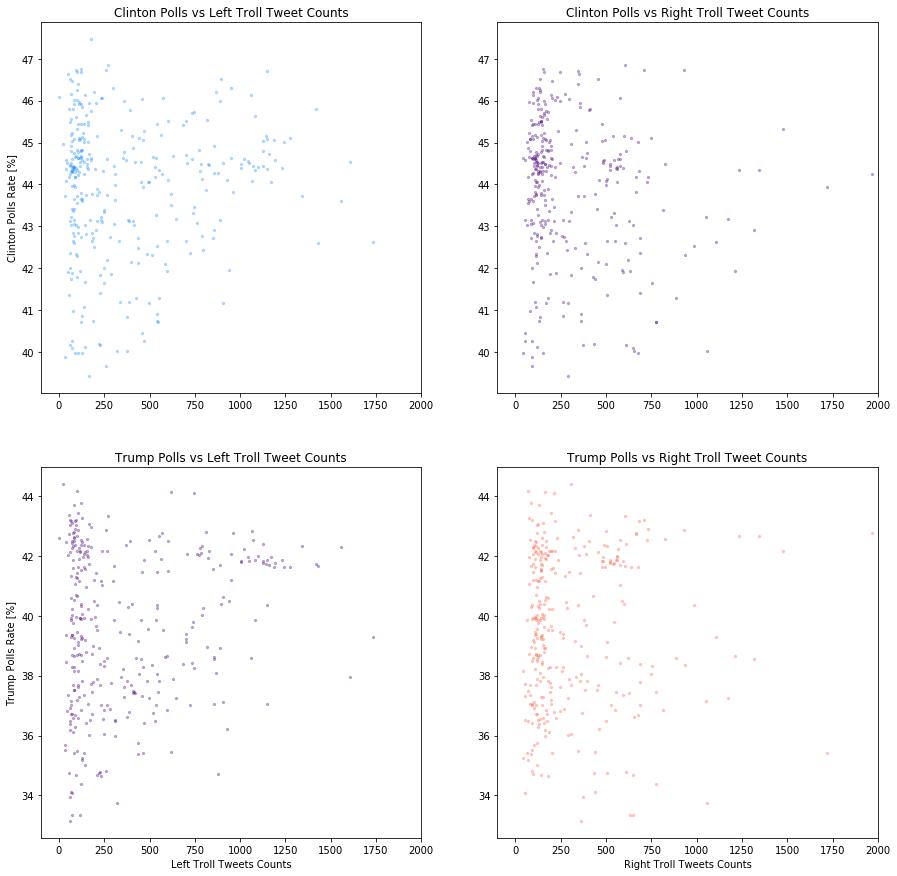

In [15]:
figTweetPolls = plt.figure(figsize=(15,15))

ax1 = figTweetPolls.add_subplot(2,2,1)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='adjpoll_clinton', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Clinton Polls vs Left Troll Tweet Counts')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Clinton Polls Rate [%]')
ax1.set_xlim(-100,2000)

ax2 = figTweetPolls.add_subplot(2,2,2)
data_tweet_polls.plot.scatter(x='RightTroll count', y='adjpoll_clinton', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Clinton Polls vs Right Troll Tweet Counts')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
ax2.set_xlim(-100,2000)

ax3 = figTweetPolls.add_subplot(2,2,3)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='adjpoll_trump', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Trump Polls vs Left Troll Tweet Counts')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Trump Polls Rate [%]')
ax3.set_xlim(-100,2000)

ax4 = figTweetPolls.add_subplot(2,2,4)
data_tweet_polls.plot.scatter(x='RightTroll count', y='adjpoll_trump', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Trump Polls vs Right Troll Tweet Counts')
ax4.set_xlabel('Right Troll Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
ax4.set_xlim(-100,2000)


In [16]:
data_tweet_polls.corr('pearson')

,adjpoll_clinton,adjpoll_trump,RightTroll count,LeftTroll count
adjpoll_clinton,1.000000,0.473702,0.030513,0.071193
adjpoll_trump,0.473702,1.000000,0.155309,0.133947
RightTroll count,0.030513,0.155309,1.000000,0.271106
LeftTroll count,0.071193,0.133947,0.271106,1.000000


As visible in the above plot and the corresponding pearson coefficient, there are no clear correlation between number of troll tweets and the polls rate. <br>
However we cannot expect the troll tweet to chnage the polls drastically up to the percent changes. There are many more factors playing in the poll than just the troll tweets. In consequences, we will look at the polls variation over time and look whether it correltate with troll activity on twitter. To do so we compute the derivative of the polls rate with respect to time:  

In [17]:
#get the derivative with respect to time for the Clinton and Trump Polls 
data_tweet_polls[['dpolls_clinton', 'dpolls_trump']] = data_tweet_polls[['adjpoll_clinton','adjpoll_trump']].diff()
data_tweet_polls['time_diff'] = data_tweet_polls.index.to_series().diff().dt.days
data_tweet_polls['dpolls_clinton/dt'] = data_tweet_polls['dpolls_clinton']/data_tweet_polls['time_diff']
data_tweet_polls['dpolls_trump/dt'] = data_tweet_polls['dpolls_trump']/data_tweet_polls['time_diff']
data_tweet_polls.head(2)

,adjpoll_clinton,adjpoll_trump,RightTroll count,LeftTroll count,dpolls_clinton,dpolls_trump,time_diff,dpolls_clinton/dt,dpolls_trump/dt
2015-11-13,44.955033,44.399360,309.0,24.0,NaN,NaN,NaN,NaN,NaN
2015-11-15,47.463690,42.957813,3088.0,179.0,2.508657,-1.441547,2.0,1.254328,-0.720773


We can now visualize how the polls variation changes with the troll tweets counts : 

(-100, 2000)

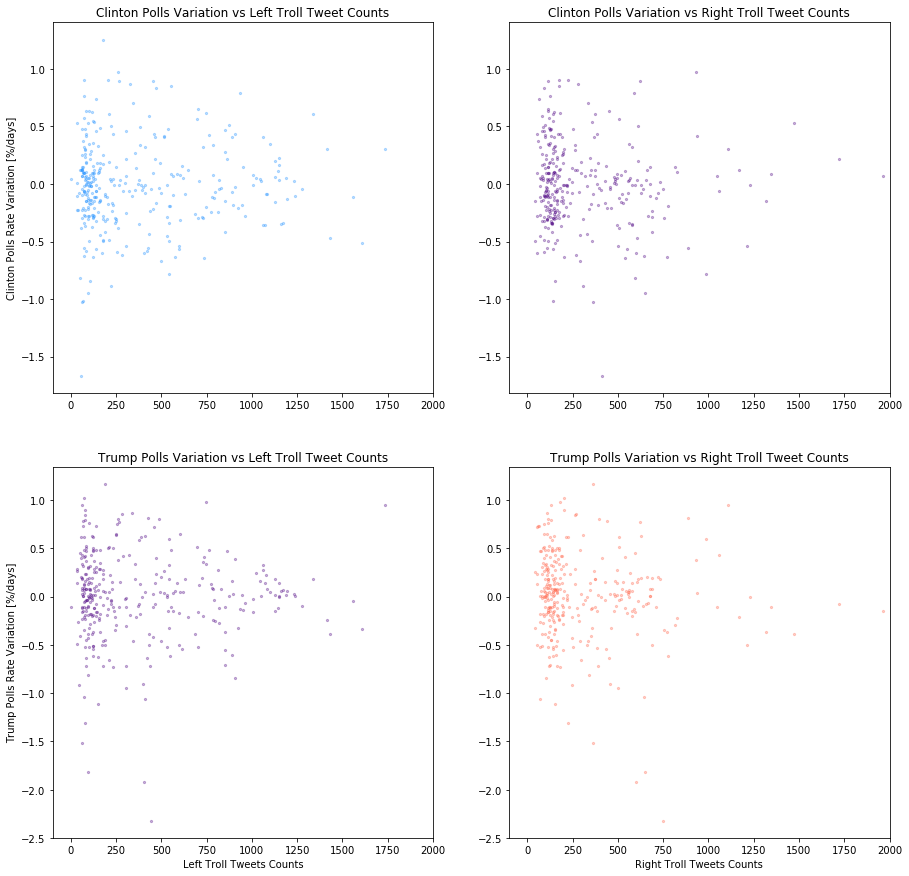

In [18]:
figTweetVarPolls = plt.figure(figsize=(15,15))

ax1 = figTweetVarPolls.add_subplot(2,2,1)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='dpolls_clinton/dt', ax=ax1, color='dodgerblue',marker='.',alpha=0.3, legend=False)
ax1.set_title('Clinton Polls Variation vs Left Troll Tweet Counts')
ax1.set_xlabel('')#'Left Troll Tweets Counts')
ax1.set_ylabel('Clinton Polls Rate Variation [%/days]')
ax1.set_xlim(-100,2000)

ax2 = figTweetVarPolls.add_subplot(2,2,2)
data_tweet_polls.plot.scatter(x='RightTroll count', y='dpolls_clinton/dt', ax=ax2, color='indigo',marker='.',alpha=0.3, legend=False)
ax2.set_title('Clinton Polls Variation vs Right Troll Tweet Counts')
ax2.set_xlabel('')#'Right Troll Tweets Counts')
ax2.set_ylabel('')#'Clinton Polls Rate [%]')
ax2.set_xlim(-100,2000)

ax3 = figTweetVarPolls.add_subplot(2,2,3)
data_tweet_polls.plot.scatter(x='LeftTroll count', y='dpolls_trump/dt', ax=ax3, color='indigo',marker='.',alpha=0.3, legend=False)
ax3.set_title('Trump Polls Variation vs Left Troll Tweet Counts')
ax3.set_xlabel('Left Troll Tweets Counts')
ax3.set_ylabel('Trump Polls Rate Variation [%/days]')
ax3.set_xlim(-100,2000)

ax4 = figTweetVarPolls.add_subplot(2,2,4)
data_tweet_polls.plot.scatter(x='RightTroll count', y='dpolls_trump/dt', ax=ax4, color='tomato',marker='.',alpha=0.3, legend=False)
ax4.set_title('Trump Polls Variation vs Right Troll Tweet Counts')
ax4.set_xlabel('Right Troll Tweets Counts')
ax4.set_ylabel('')#'Trump Polls Rate [%]')
ax4.set_xlim(-100,2000)

Here is another way of looking (qualitatively) at it : 

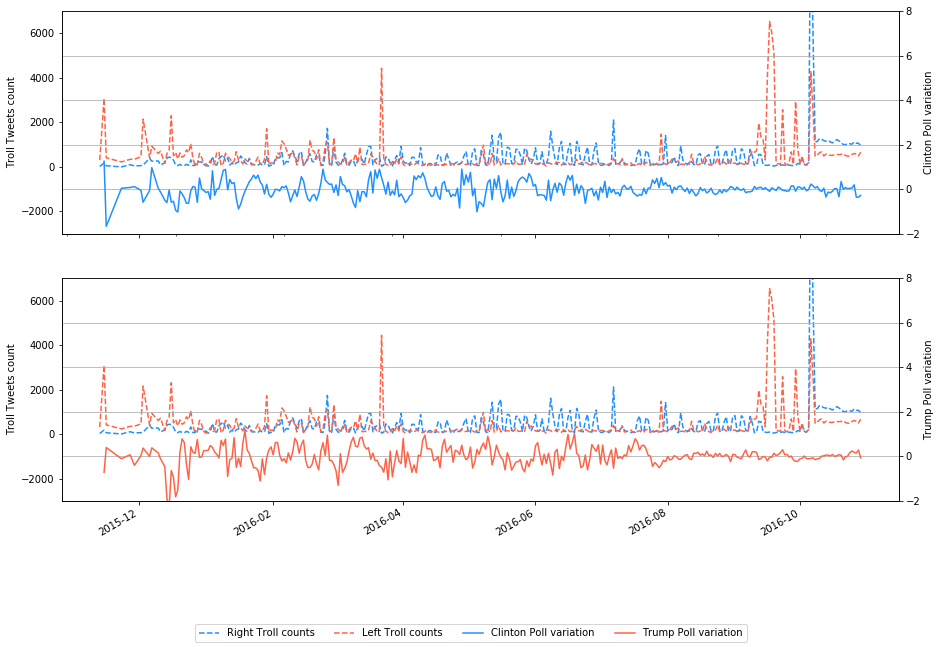

In [19]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
ax1_2 = ax1.twinx()
data_tweet_polls.loc[:,['LeftTroll count','RightTroll count']].plot(ax=ax1, color=['dodgerblue','tomato'], linestyle='--')
data_tweet_polls.loc[:,['dpolls_clinton/dt']].plot(ax=ax1_2, color='dodgerblue')
ax1_2.set_ylim(-2,8)
ax1.set_ylim(-3000,7000)
ax1_2.grid(True)
ax1.set_ylabel('Troll Tweets count')
ax1_2.set_ylabel('Clinton Poll variation')

ax2 = fig.add_subplot(212)
ax2_2 = ax2.twinx()
data_tweet_polls.loc[:,['LeftTroll count','RightTroll count']].plot(ax=ax2, color=['dodgerblue','tomato'], linestyle='--')
data_tweet_polls.loc[:,['dpolls_trump/dt']].plot(ax=ax2_2, color='tomato')
ax2_2.set_ylim(-2,8)
ax2.set_ylim(-3000,7000)
ax2_2.grid(True)
ax2.set_ylabel('Troll Tweets count')
ax2_2.set_ylabel('Trump Poll variation')

ax1.legend().remove()
ax1_2.legend().remove()
ax2.legend().remove()
ax2_2.legend().remove()

fig.legend((ax1.get_lines()[0],ax1.get_lines()[1],ax1_2.get_lines()[0],ax2_2.get_lines()[0]),('Right Troll counts','Left Troll counts','Clinton Poll variation','Trump Poll variation'), loc = 'lower center', ncol=4 )

In [20]:
data_tweet_polls[['RightTroll count','LeftTroll count','dpolls_clinton/dt','dpolls_trump/dt']].corr(method='pearson')

,RightTroll count,LeftTroll count,dpolls_clinton/dt,dpolls_trump/dt
RightTroll count,1.000000,0.271106,0.029243,-0.090177
LeftTroll count,0.271106,1.000000,0.054269,-0.024140
dpolls_clinton/dt,0.029243,0.054269,1.000000,0.059004
dpolls_trump/dt,-0.090177,-0.024140,0.059004,1.000000
